<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


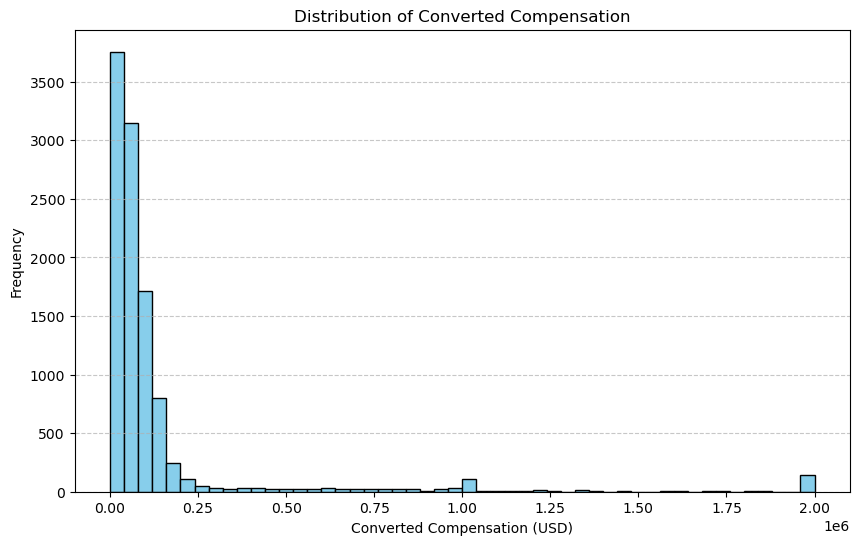

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

# Filter out any rows with NaN or missing values in the "ConvertedComp" column
df = df.dropna(subset=['ConvertedComp'])

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Plot the histogram for the column `ConvertedComp`.


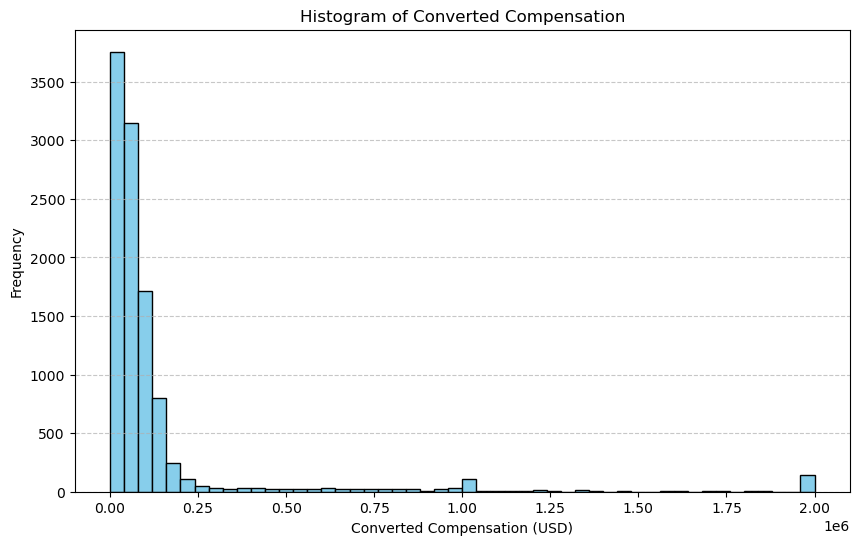

In [7]:
# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


What is the median of the column `ConvertedComp`?


In [8]:
median_converted_comp = df['ConvertedComp'].median()
print("Median of Converted Compensation:", median_converted_comp)


Median of Converted Compensation: 57745.0


How many responders identified themselves only as a **Man**?


In [9]:
# Filter the DataFrame to include only rows where the "Gender" column is "Man"
male_responders = df[df['Gender'] == 'Man']

# Count the number of male responders
count_male_responders = male_responders.shape[0]

print("Number of responders who identified themselves as Man:", count_male_responders)


Number of responders who identified themselves as Man: 9725


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
# Filter the DataFrame to include only rows where the "Gender" column is "Woman"
female_responders = df[df['Gender'] == 'Woman']

# Calculate the median ConvertedComp for female responders
median_converted_comp_woman = female_responders['ConvertedComp'].median()

print("Median ConvertedComp for responders identified as Woman:", median_converted_comp_woman)



Median ConvertedComp for responders identified as Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [11]:
# Calculate the five-number summary for the "Age" column
age_summary = df['Age'].describe(percentiles=[.25, .5, .75])

# Extract the desired statistics
min_age = age_summary['min']
q1_age = age_summary['25%']
median_age = age_summary['50%']
q3_age = age_summary['75%']
max_age = age_summary['max']

print("Five-Number Summary for the Age column:")
print(f"Minimum Age: {min_age}")
print(f"1st Quartile (Q1): {q1_age}")
print(f"Median (Q2): {median_age}")
print(f"3rd Quartile (Q3): {q3_age}")
print(f"Maximum Age: {max_age}")



Five-Number Summary for the Age column:
Minimum Age: 16.0
1st Quartile (Q1): 25.0
Median (Q2): 29.0
3rd Quartile (Q3): 35.0
Maximum Age: 99.0


Plot a histogram of the column `Age`.


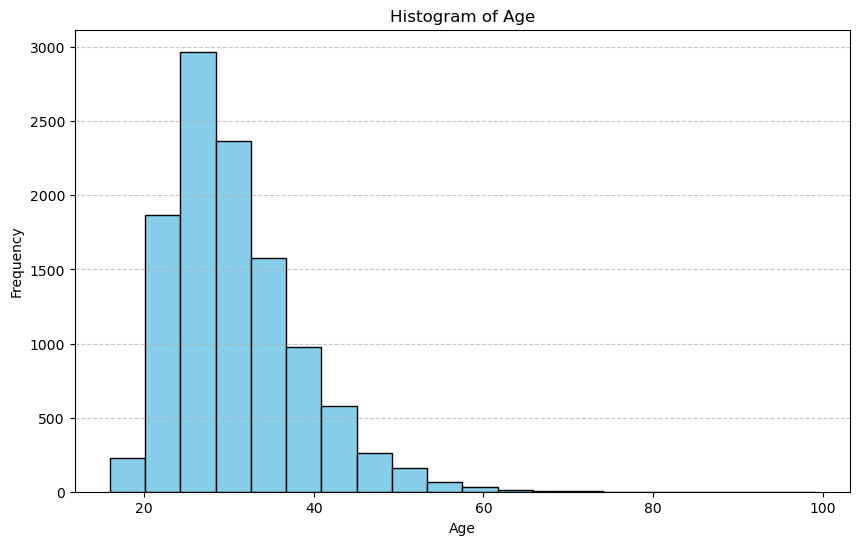

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

# Filter out any rows with NaN or missing values in the "Age" column
df = df.dropna(subset=['Age'])

# Create a histogram to visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


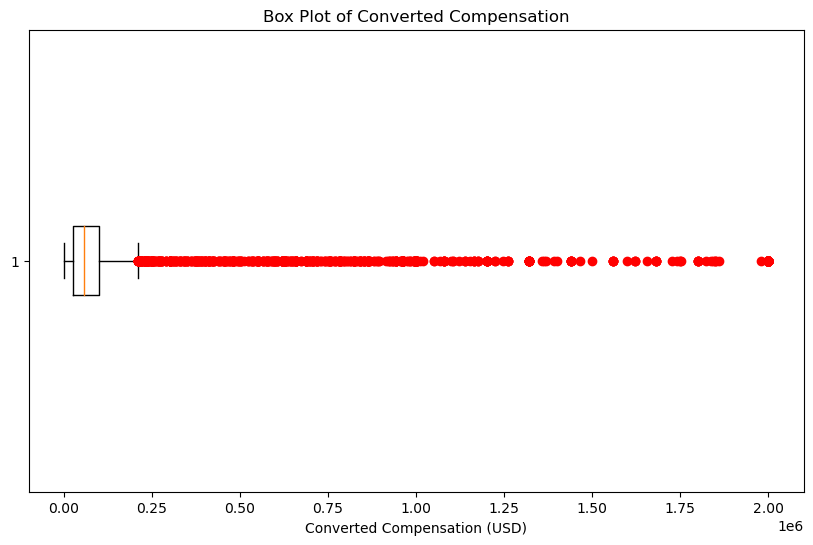

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

# Filter out any rows with NaN or missing values in the "ConvertedComp" column
df = df.dropna(subset=['ConvertedComp'])

# Create a box plot for the "ConvertedComp" column
plt.figure(figsize=(10, 6))
plt.boxplot(df['ConvertedComp'], vert=False, sym='r')
plt.title('Box Plot of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.show()


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [14]:
# Calculate the IQR for the "ConvertedComp" column
converted_comp_summary = df['ConvertedComp'].describe(percentiles=[.25, .75])

# Extract the first quartile (Q1) and third quartile (Q3)
q1 = converted_comp_summary['25%']
q3 = converted_comp_summary['75%']

# Calculate the IQR
iqr = q3 - q1

print("Interquartile Range (IQR) for ConvertedComp:", iqr)


Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [15]:
# Calculate the lower and upper bounds for potential outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)



Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [16]:
# Identify outliers in the "ConvertedComp" column
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]

# Count the number of outliers
num_outliers = len(outliers)

print("Number of outliers in ConvertedComp:", num_outliers)


Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [17]:
# Create a new DataFrame without outliers in the "ConvertedComp" column
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]

# Verify the new DataFrame without outliers
print("New DataFrame without outliers:")
print(df_no_outliers)



New DataFrame without outliers:
       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than

In [19]:
#What is the median ConvertedComp before removing outliers?

# Calculate the median of the "ConvertedComp" column before removing outliers
median_converted_comp_before = df['ConvertedComp'].median()

print("Median ConvertedComp before removing outliers:", median_converted_comp_before)


Median ConvertedComp before removing outliers: 57745.0


In [20]:
#What is the median ConvertedComp after removing outliers?
# Calculate the median of the "ConvertedComp" column after removing outliers
median_converted_comp_after = df_no_outliers['ConvertedComp'].median()

print("Median ConvertedComp after removing outliers:", median_converted_comp_after)


Median ConvertedComp after removing outliers: 52704.0


In [21]:
#Based on the boxplot of ‘Age’ how many outliers do you see below Q1?
# Calculate the lower bound for the "Age" column
lower_bound_age = q1_age - 1.5 * iqr

# Identify outliers below Q1 for the "Age" column
outliers_below_Q1_age = df[df['Age'] < lower_bound_age]

# Count the number of outliers below Q1
num_outliers_below_Q1_age = len(outliers_below_Q1_age)

print("Number of outliers below Q1 for the Age column:", num_outliers_below_Q1_age)


Number of outliers below Q1 for the Age column: 0


In [22]:
#What is the mean ConvertedComp after removing outliers? 

In [23]:
# Calculate the mean of the "ConvertedComp" column after removing outliers
mean_converted_comp_after = df_no_outliers['ConvertedComp'].mean()

print("Mean ConvertedComp after removing outliers:", mean_converted_comp_after)


Mean ConvertedComp after removing outliers: 59883.20838915799


# Calculate the median of the "ConvertedComp" column before removing outliers
median_converted_comp_before = df['ConvertedComp'].median()

print("Median ConvertedComp before removing outliers:", median_converted_comp_before)
## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [18]:
# Calculate the correlation between Age and all other numerical columns
correlation = df.corrwith(df['Age'])

# Display the correlation values
print("Correlation between Age and other numerical columns:")
print(correlation)



Correlation between Age and other numerical columns:
Respondent       0.002394
CompTotal        0.006949
ConvertedComp    0.105386
WorkWeekHrs      0.031592
CodeRevHrs      -0.015742
Age              1.000000
dtype: float64


In [27]:
#Which column has a negative correlation with "Age"? 
# Calculate the correlation between Age and all other numerical columns
correlation = df.corrwith(df['Age'])

# Identify the column with a negative correlation
neg_corr_columns = correlation[correlation < 0]

print("Columns with a negative correlation with Age:")
print(neg_corr_columns)


Columns with a negative correlation with Age:
CodeRevHrs   -0.015742
dtype: float64


In [29]:
#Which column has the highest correlation with "Age"?
# Calculate the correlation between Age and all other numerical columns
correlation = df.corrwith(df['Age'])

# Identify the column with the highest positive correlation
max_corr_column = correlation.idxmax()

print("Column with the highest correlation with Age:", max_corr_column)
print("Correlation coefficient:", correlation[max_corr_column])


Column with the highest correlation with Age: Age
Correlation coefficient: 1.0


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
